# 07: 图像几何变换
# 目标
* 实现旋转、平移和缩放图片
* OpenCV 函数：cv2.resize(), cv2.flip(), cv2.warpAffine()

# 缩放图片
缩放就是调整图片的大小，使用cv2.resize()函数实现缩放。可以按照比例缩放，也可以按照指定的大小缩放：

In [8]:
import cv2


In [9]:
img =cv2.imread('./imgs/dog.jpg')

res=cv2.resize(img,(150,150))

res2=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_LINEAR)

cv2.imshow('shrink',res)
cv2.imshow('zoom',res2)
cv2.waitKey(0)

-1

我们也可以指定缩放方法interpolation，更专业点叫插值方法，默认是INTER_LINEAR，全部可以参考：InterpolationFlags
https://docs.opencv.org/4.0.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121

# 翻转图片
镜像翻转图片，可以用cv2.flip()函数：


dst = cv2.flip(img, 1)


其中，参数 2 = 0：垂直翻转(沿 x 轴)，参数 2 > 0: 水平翻转(沿 y 轴)，参数 2 < 0: 水平垂直翻转。

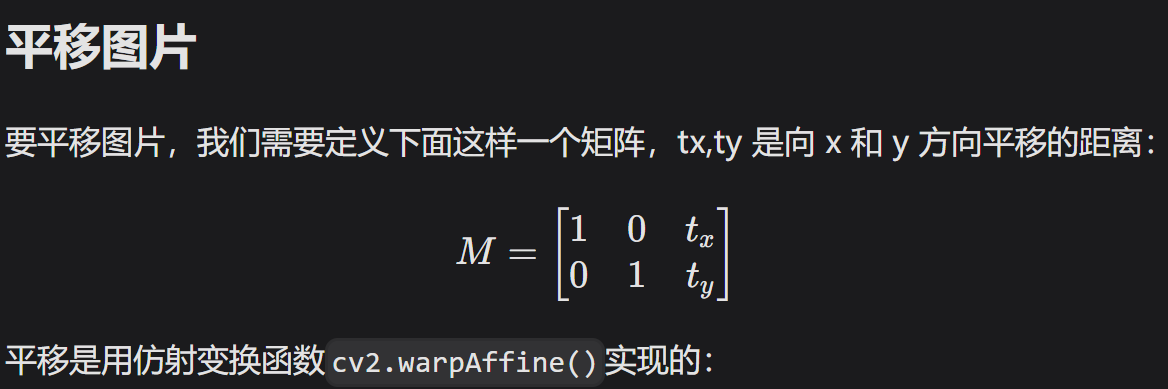

In [12]:
# 平移图片
import numpy as np

rows, cols = img.shape[:2]

# 定义平移矩阵，需要是 numpy 的 float32 类型
# x 轴平移 100，y 轴平移 50
M = np.float32([[1, 0, 100], [0, 1, 50]])
# 用仿射变换实现平移
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('shift', dst)
cv2.waitKey(0)

-1

# 旋转图片
旋转同平移一样，也是用仿射变换实现的，因此也需要定义一个变换矩阵。OpenCV 直接提供了 cv2.getRotationMatrix2D()函数来生成这个矩阵，该函数有三个参数：

* 参数 1：图片的旋转中心
* 参数 2：旋转角度(正：逆时针，负：顺时针)
* 参数 3：缩放比例，0.5 表示缩小一半

In [11]:
M=cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)
dst=cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('rotation',dst)
cv2.waitKey(0)

-1

# 小结
* cv2.resize()缩放图片，可以按指定大小缩放，也可以按比例缩放。
* cv2.flip()翻转图片，可以指定水平/垂直/水平垂直翻转三种方式。
* 平移/旋转是靠仿射变换cv2.warpAffine()实现的。

# 番外篇：仿射变换与透视变换
常见的 2D 图像变换从原理上讲主要包括基于 2×3 矩阵的仿射变换和基于 3×3 矩阵透视变换。
# 仿射变换
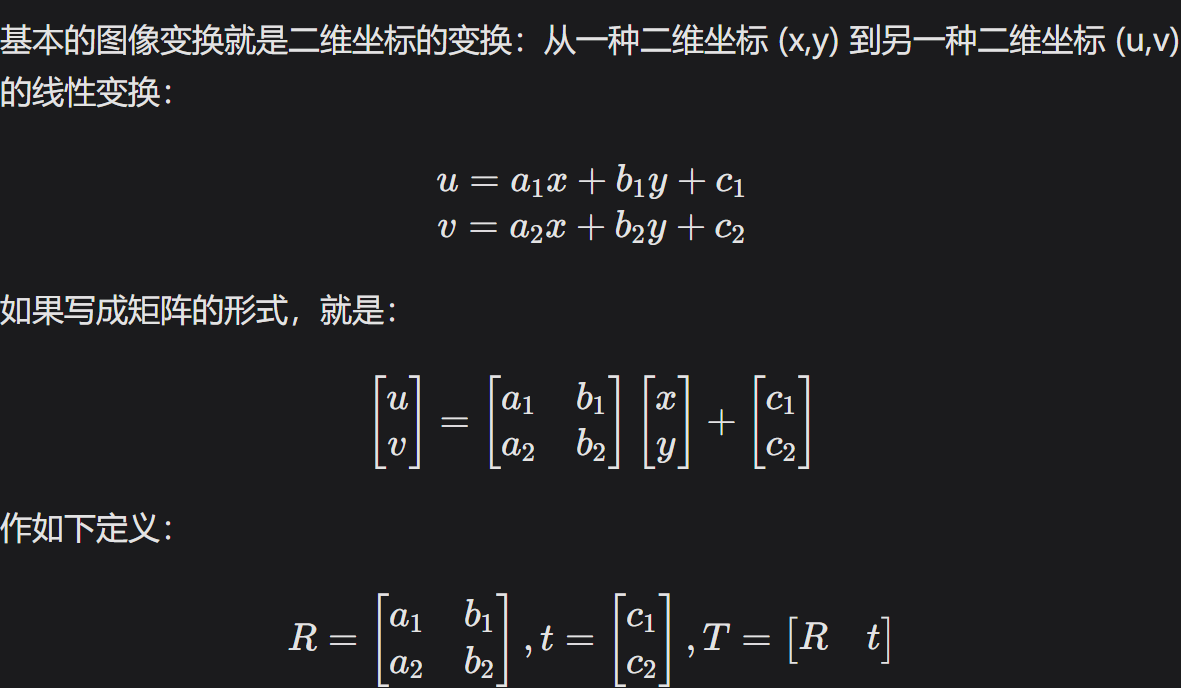
矩阵 T(2×3) 就称为仿射变换的变换矩阵，R 为线性变换矩阵，t 为平移矩阵，简单来说，仿射变换就是线性变换 + 平移。变换后直线依然是直线，平行线依然是平行线，直线间的相对位置关系不变，因此非共线的三个对应点便可确定唯一的一个仿射变换，线性变换 4 个自由度 + 平移 2 个自由度 →仿射变换自由度为 6。

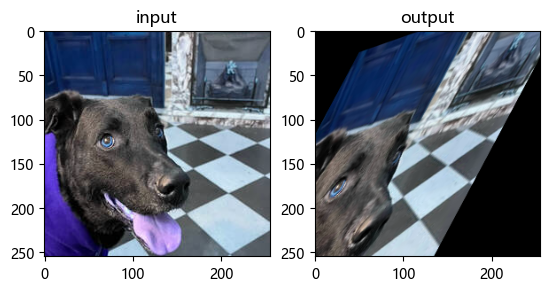

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./imgs/dog.jpg')
rows, cols = img.shape[:2]

# 变换前的三个点
pts1 = np.float32([[50, 65], [150, 65], [210, 210]])
# 变换后的三个点
pts2 = np.float32([[50, 100], [150, 65], [100, 250]])

# 生成变换矩阵
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img), plt.title('input')
plt.subplot(122), plt.imshow(dst), plt.title('output')
plt.show()

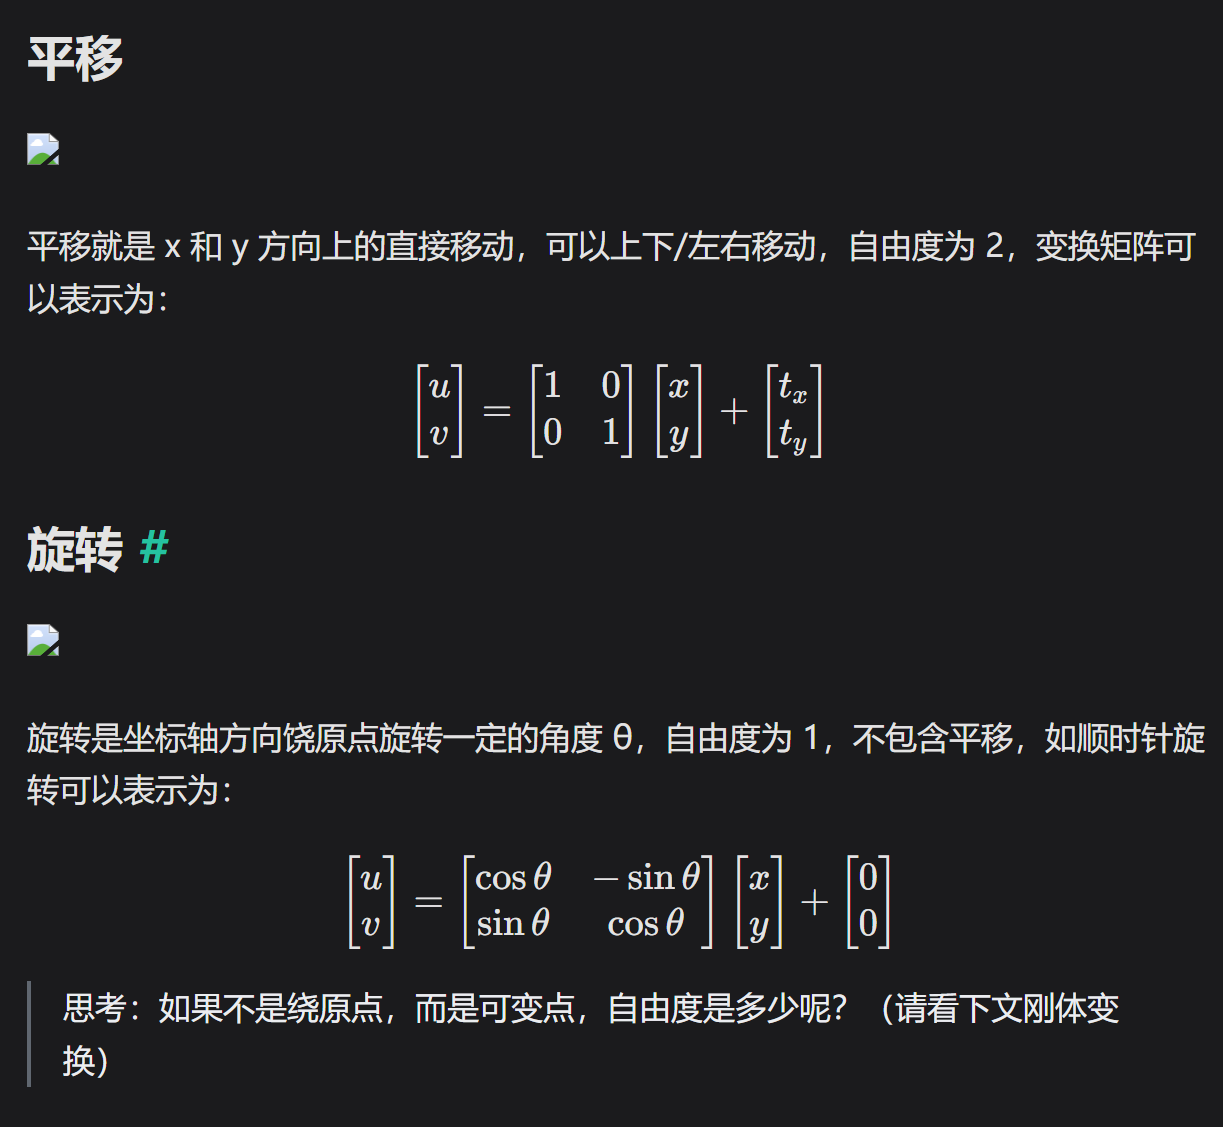
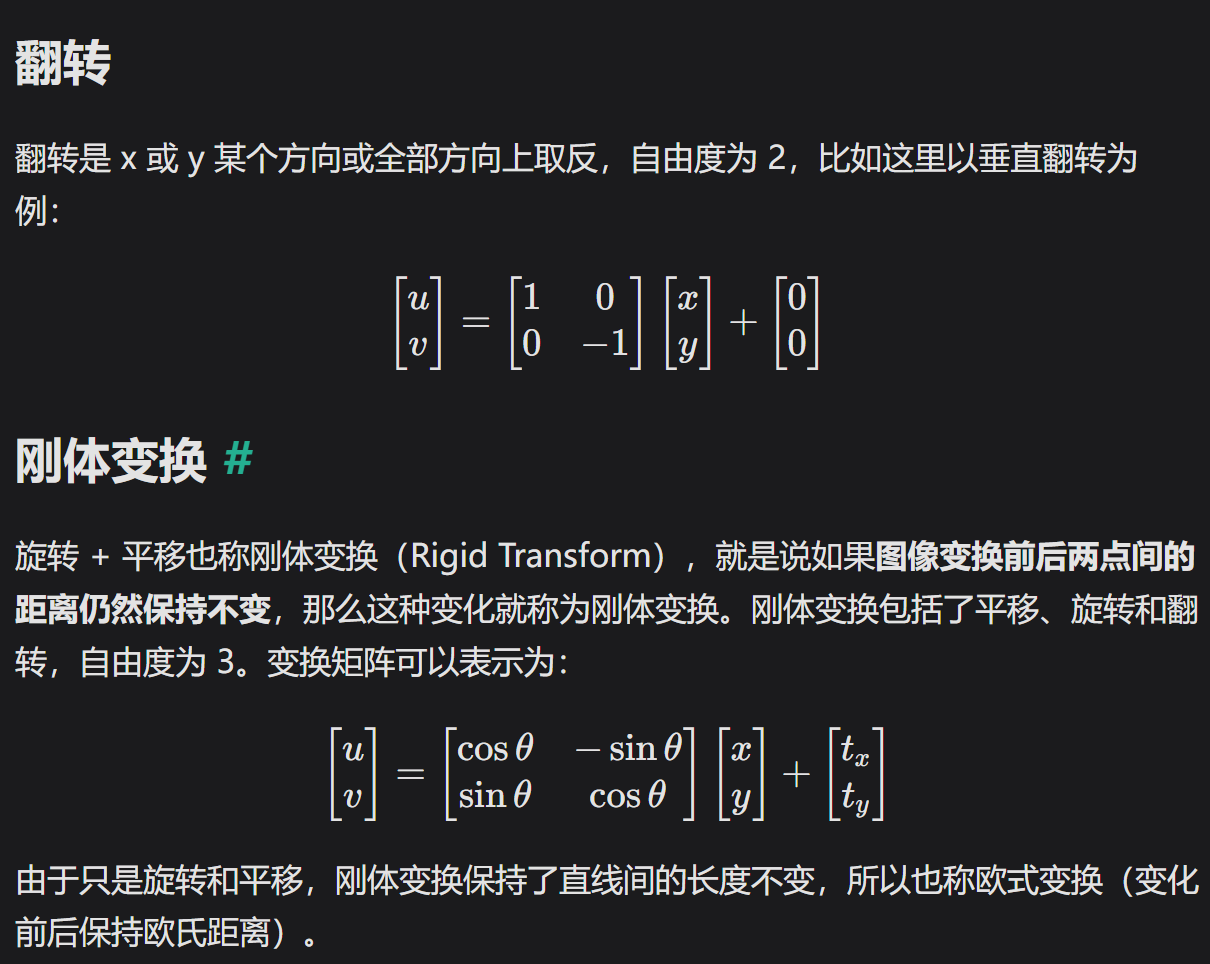
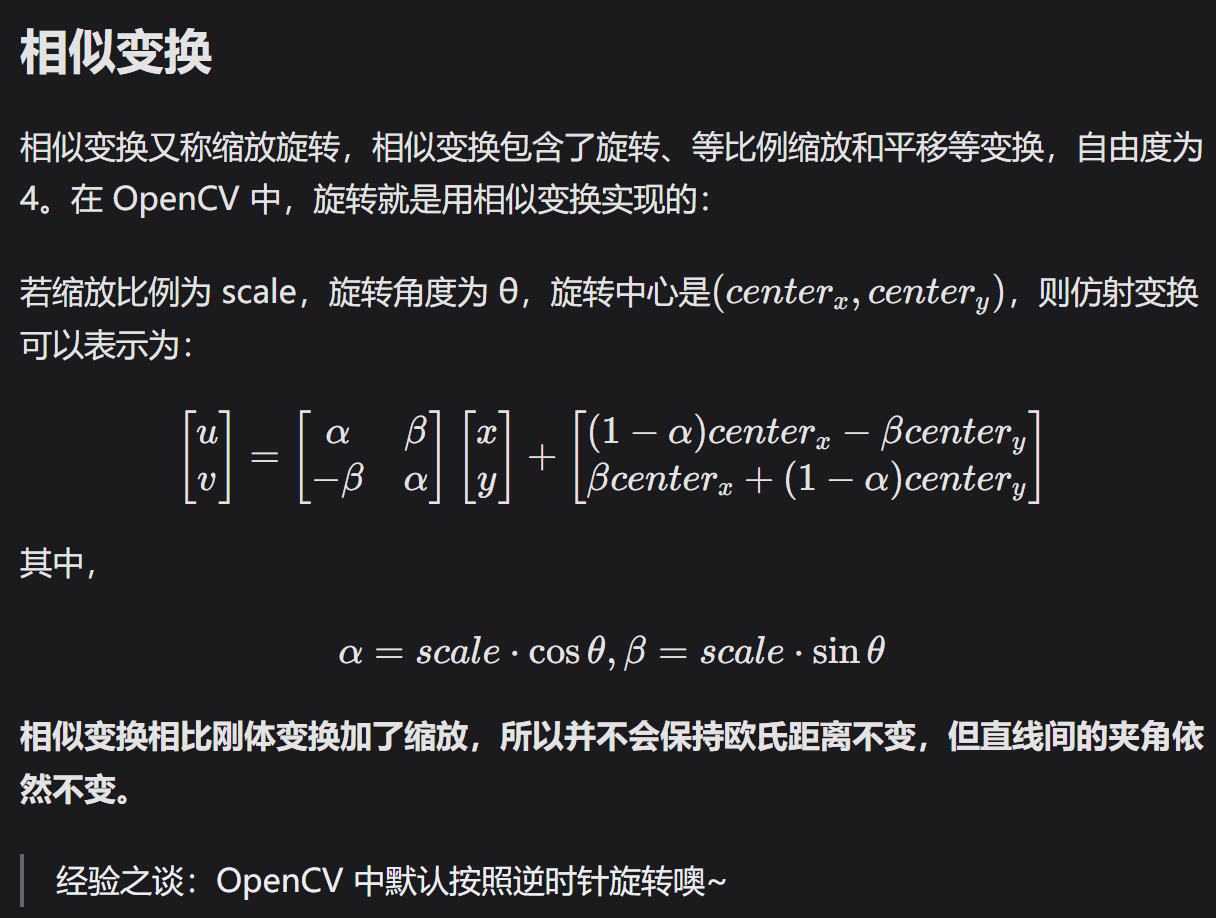
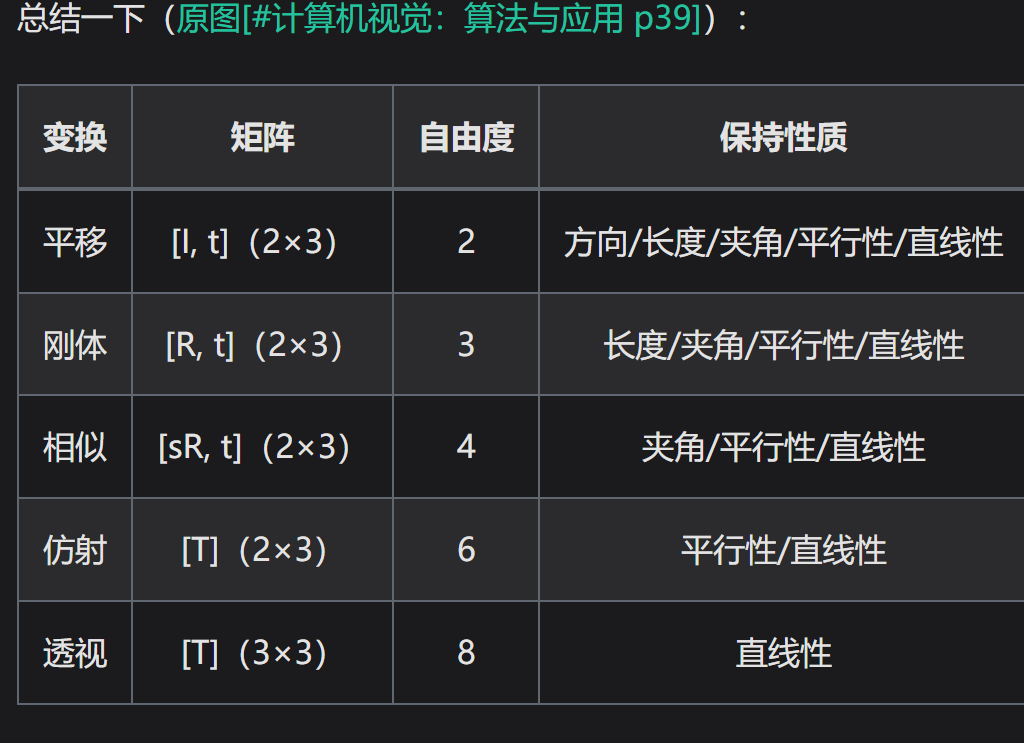
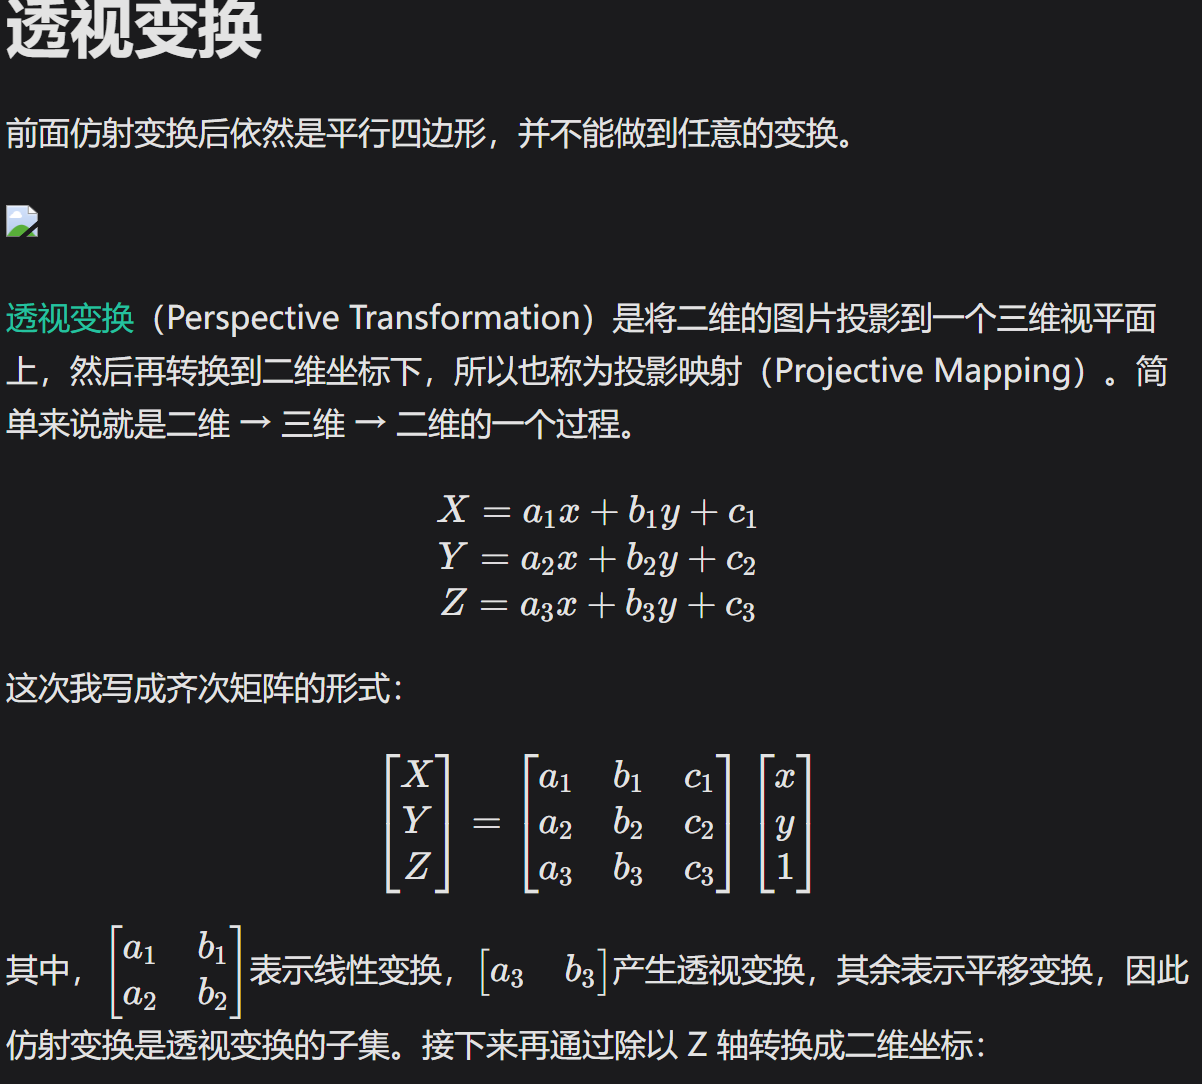
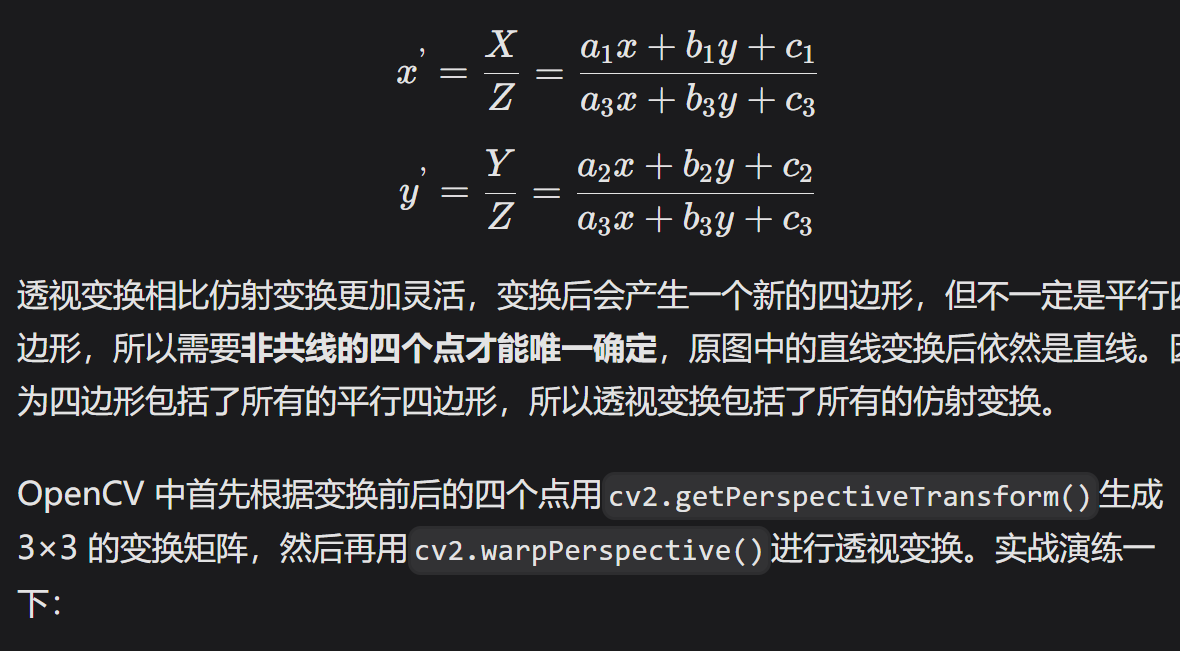

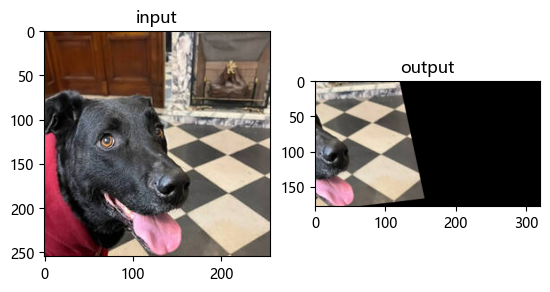

In [15]:
img = cv2.imread('./imgs/dog.jpg')

# 原图中卡片的四个角点
pts1 = np.float32([[148, 80], [437, 114], [94, 247], [423, 288]])
# 变换后分别在左上、右上、左下、右下四个点
pts2 = np.float32([[0, 0], [320, 0], [0, 178], [320, 178]])

# 生成透视变换矩阵
M = cv2.getPerspectiveTransform(pts1, pts2)
# 进行透视变换，参数 3 是目标图像大小
dst = cv2.warpPerspective(img, M, (320, 178))

plt.subplot(121), plt.imshow(img[:, :, ::-1]), plt.title('input')
plt.subplot(122), plt.imshow(dst[:, :, ::-1]), plt.title('output')
plt.show()